In [608]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix


In [609]:
df = pd.read_csv("E Commerce Dataset.csv")
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [611]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [612]:
df.isnull().sum()*100/len(df)

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

###  Null value imputation


In [614]:
null_imputation = ["Tenure","WarehouseToHome","HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder"]
for column in null_imputation:
    df[column].fillna(df[column].median(),inplace= True)

In [615]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [616]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13

In [617]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

# As mobile phone and phone are same let's merge

In [619]:
category_mapping = {'Phone':'Mobile Phone'}
df['PreferredLoginDevice'].replace(category_mapping,inplace =True)
print(df['PreferredLoginDevice'].value_counts())

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64


In [620]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

# As Credit Card and CC are same let's merge them

In [622]:
category_mapping = {'CC':'Credit Card'}
df['PreferredPaymentMode'].replace(category_mapping,inplace =True)
print(df['PreferredPaymentMode'].value_counts())

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
UPI                  414
COD                  365
Cash on Delivery     149
Name: count, dtype: int64


# As COD and Cash on Delivery are same let's merge them

In [624]:
category_mapping = {'COD':'Cash on Delivery'}
df['PreferredPaymentMode'].replace(category_mapping,inplace =True)
print(df['PreferredPaymentMode'].value_counts())

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64


In [625]:
# As mobile phone and phone are same let's merge
category_mapping = {'Mobile':'Mobile Phone'}
df['PreferedOrderCat'].replace(category_mapping,inplace =True)
print(df['PreferedOrderCat'].value_counts())

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64


In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Descriptive Statistics

In [628]:
## Descriptive Statistics for numerical columns
numerical_summary = df.describe()
numerical_summary

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.221492
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [629]:
## Descriptive Statistics for categorical columns
categorical_summary = df.describe(include=['object'])
categorical_summary

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,2,5,2,5,3
top,Mobile Phone,Debit Card,Male,Mobile Phone,Married
freq,3996,2314,3384,2080,2986


## Churn Analysis

In [631]:
# Compare churned vs non-churned customers across various features
not_churned = df[df['Churn'] == 0]
churned = df[df['Churn'] == 1]

### Churn Analysis for Numerical Columns 

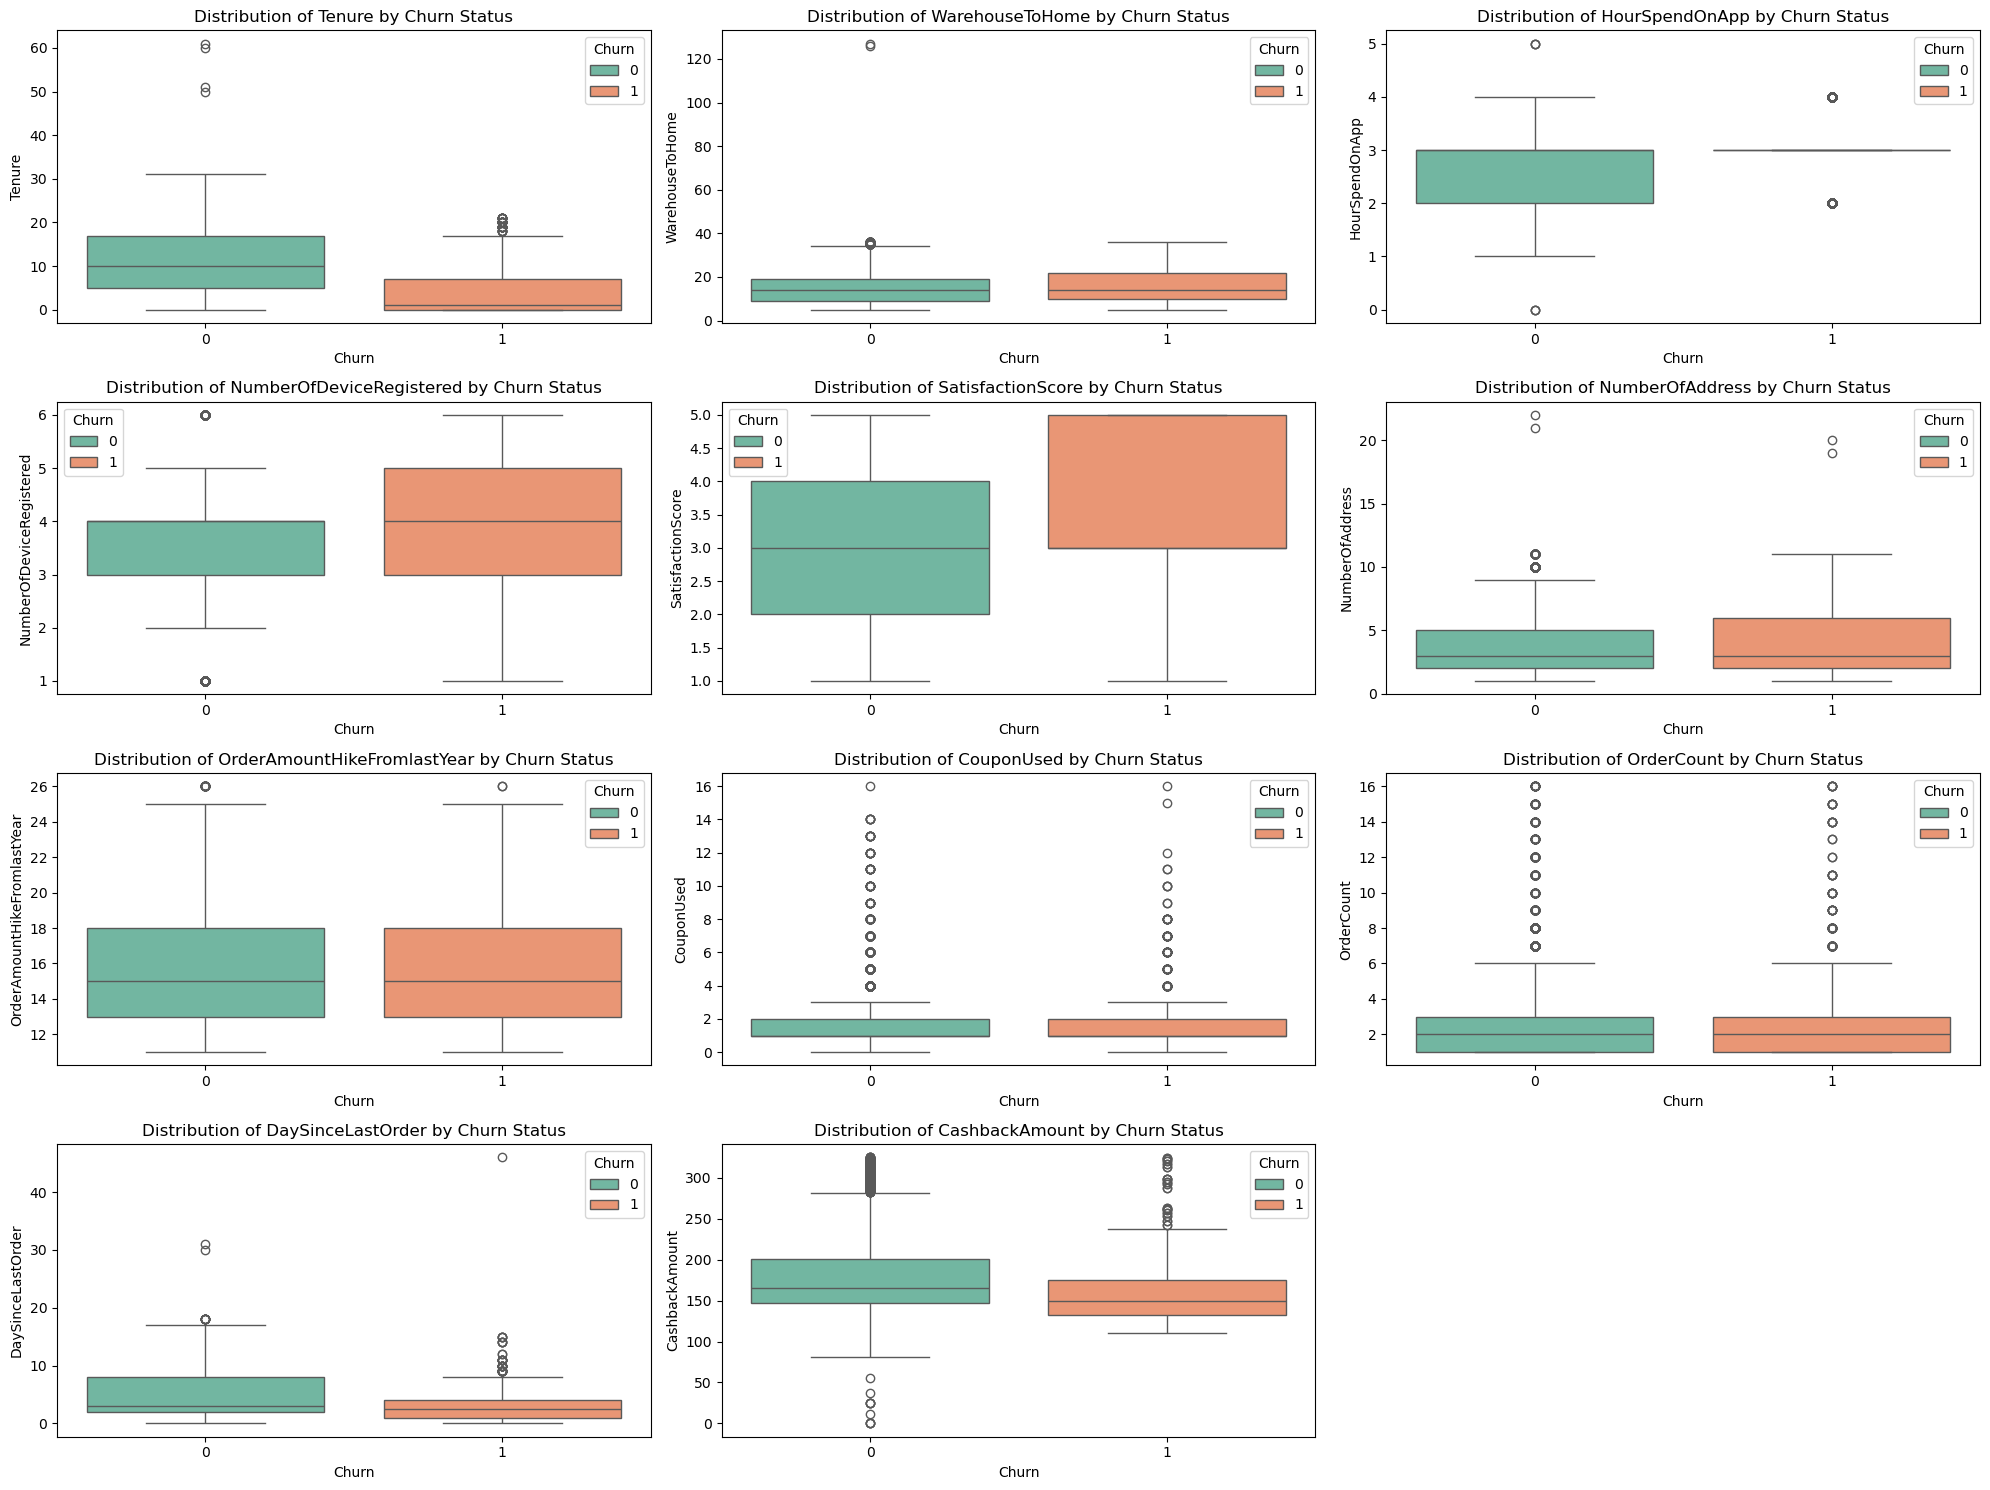

In [633]:
# List of numerical columns excluding 'CustomerID'
numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Custom palette
custom_palette = "Set2"

# Plotting box plots for numerical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Churn', y=column, hue='Churn', data=df, palette=custom_palette)
    plt.title(f'Distribution of {column} by Churn Status')
    plt.xlabel('Churn')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### Churn Analysis for Categorical Columns

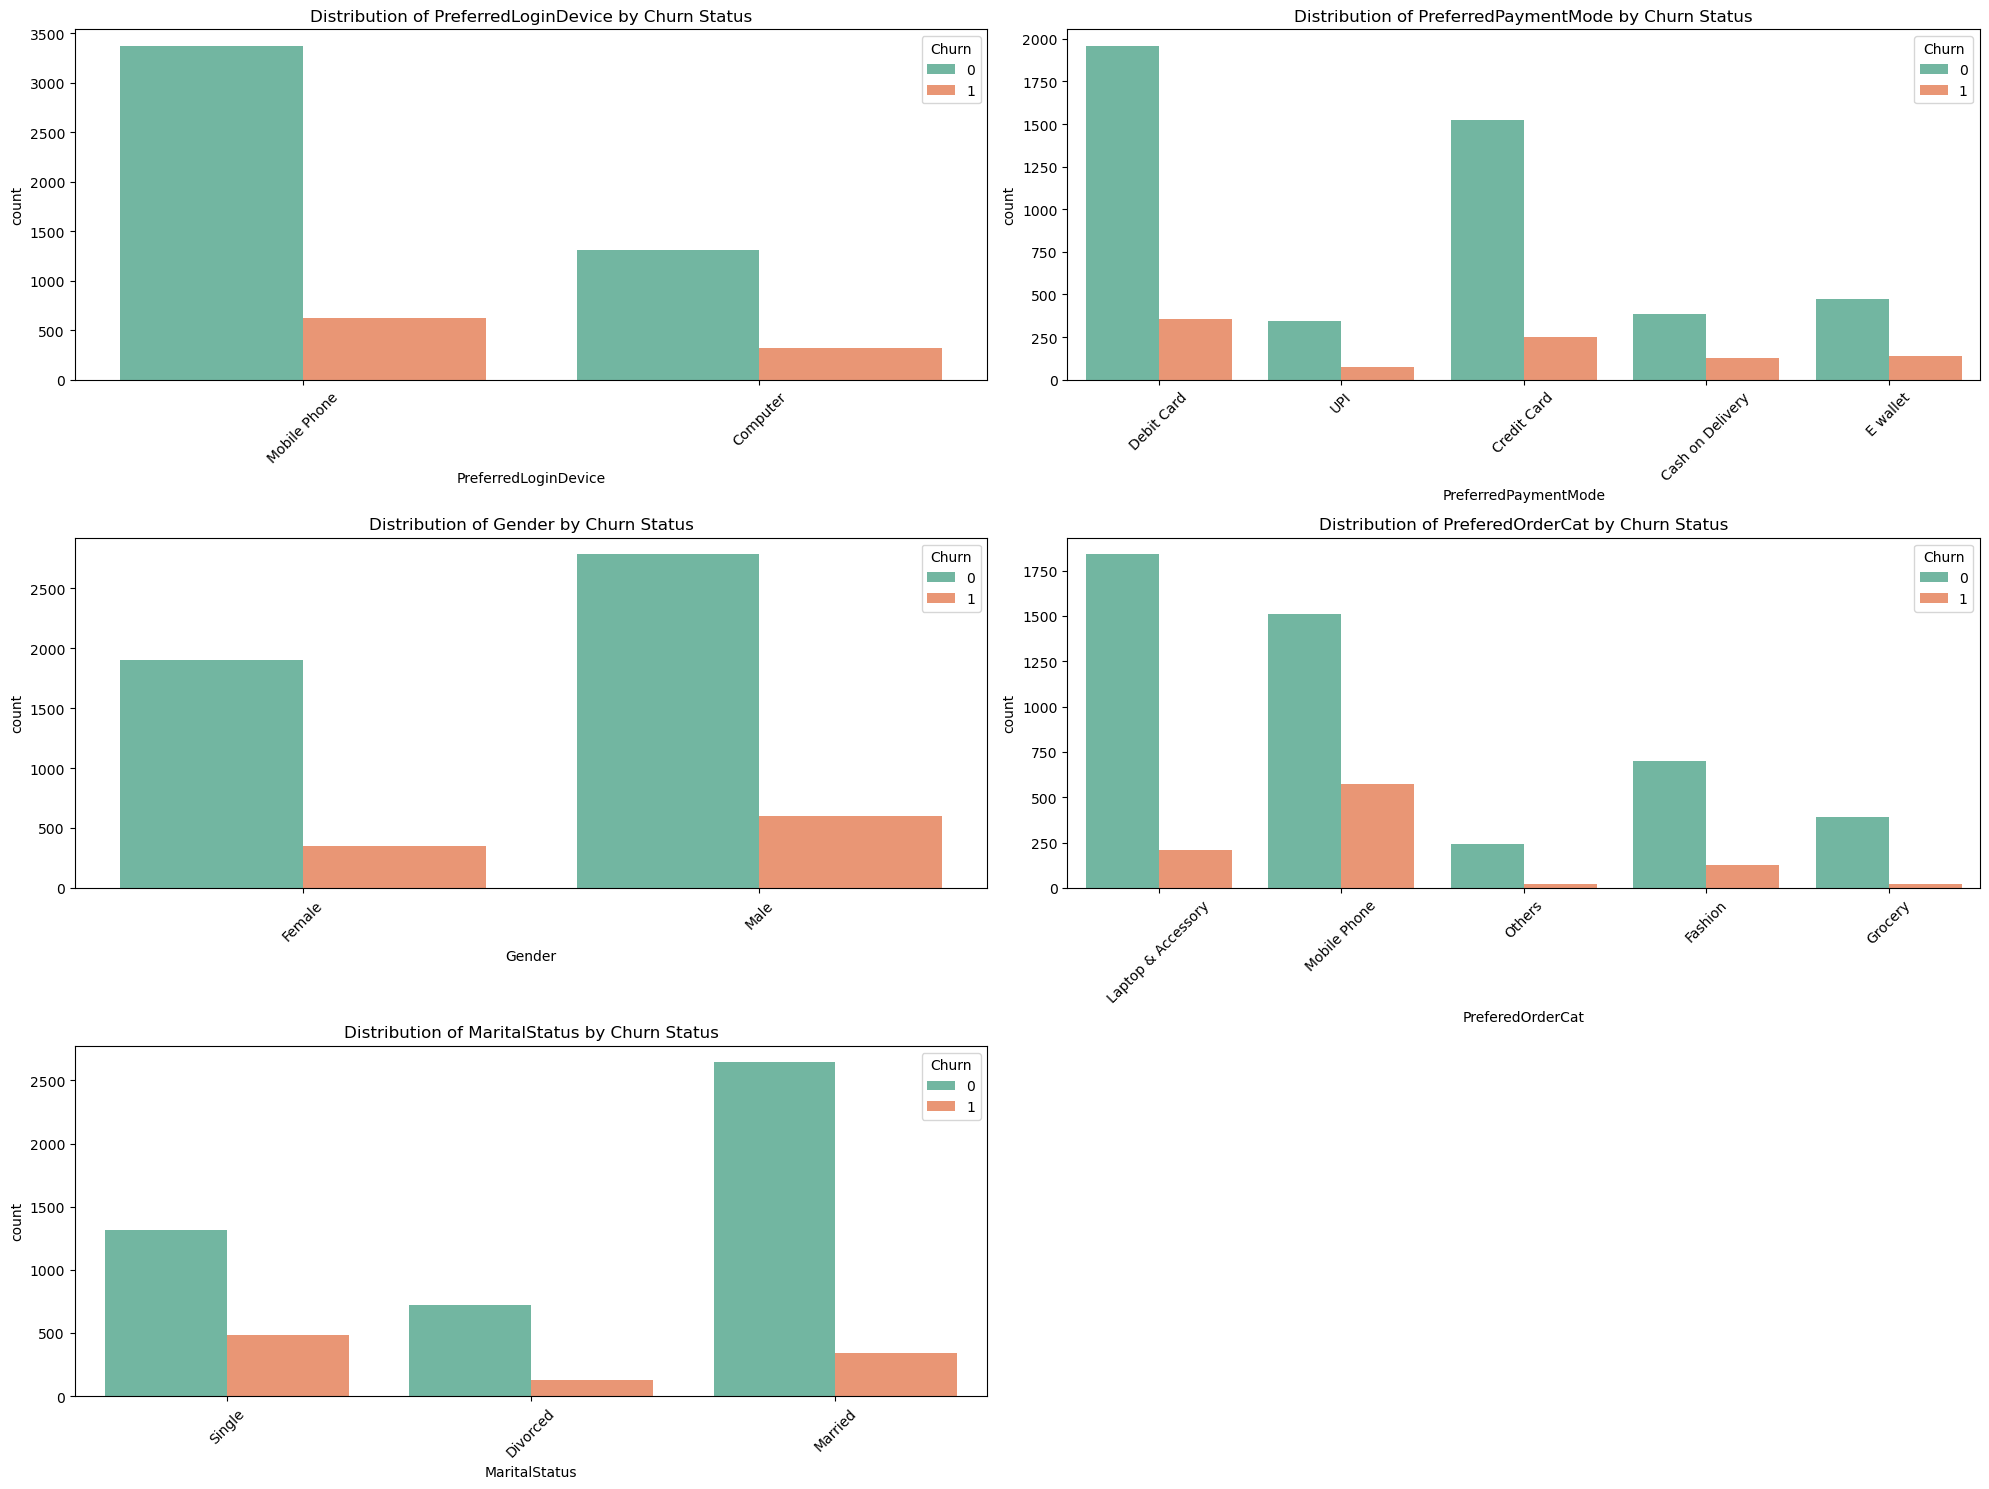

In [635]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Custom palette
custom_palette = "Set2"

# Plotting count plots for categorical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, hue='Churn', data=df, palette=custom_palette)
    plt.title(f'Distribution of {column} by Churn Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Inferential Statistics Analysis

## Hypothesis Testing

In [638]:
from scipy.stats import ttest_ind, chi2_contingency

# Data preprocessing (assuming df is already defined and loaded)
not_churned = df[df['Churn'] == 0]
churned = df[df['Churn'] == 1]

# Significance level
alpha = 0.05

# T-test for numerical variables
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('Churn')
t_test_results = {}
for column in numerical_columns:
    t_stat, p_value = ttest_ind(churned[column], not_churned[column])
    t_test_results[column] = {
        't_stat': t_stat,
        'p_value': p_value,
        'reject_null': p_value < alpha
    }
    
# Displaying T-test results with interpretation
print("T-test Results Interpretation:")

for column, result in t_test_results.items():
    if result['p_value'] > alpha:
        print(f"For {column}: We are not able to reject the null hypothesis (p-value: {result['p_value']:.2f})")
    else:
        print(f"For {column}: We reject the null hypothesis (p-value: {result['p_value']:.2f})")

print("\n")

T-test Results Interpretation:
For CustomerID: We are not able to reject the null hypothesis (p-value: 0.15)
For Tenure: We reject the null hypothesis (p-value: 0.00)
For CityTier: We reject the null hypothesis (p-value: 0.00)
For WarehouseToHome: We reject the null hypothesis (p-value: 0.00)
For HourSpendOnApp: We are not able to reject the null hypothesis (p-value: 0.16)
For NumberOfDeviceRegistered: We reject the null hypothesis (p-value: 0.00)
For SatisfactionScore: We reject the null hypothesis (p-value: 0.00)
For NumberOfAddress: We reject the null hypothesis (p-value: 0.00)
For Complain: We reject the null hypothesis (p-value: 0.00)
For OrderAmountHikeFromlastYear: We are not able to reject the null hypothesis (p-value: 0.60)
For CouponUsed: We are not able to reject the null hypothesis (p-value: 0.91)
For OrderCount: We are not able to reject the null hypothesis (p-value: 0.07)
For DaySinceLastOrder: We reject the null hypothesis (p-value: 0.00)
For CashbackAmount: We reject th

In [639]:
# Chi-square test for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
chi2_test_results = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['Churn'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_test_results[column] = {
        'chi2_stat': chi2_stat,
        'p_value': p_value,
        'reject_null': p_value < alpha
    }

# Displaying Chi-square test results with interpretation
print("Chi-square Test Results Interpretation:")
for column, result in chi2_test_results.items():
    if result['p_value'] > alpha:
        print(f"For {column}: We are not able to reject the null hypothesis (p-value: {result['p_value']:.2f})")
    else:
        print(f"For {column}: We reject the null hypothesis (p-value: {result['p_value']:.2f})")

print("\n")

Chi-square Test Results Interpretation:
For PreferredLoginDevice: We reject the null hypothesis (p-value: 0.00)
For PreferredPaymentMode: We reject the null hypothesis (p-value: 0.00)
For Gender: We reject the null hypothesis (p-value: 0.03)
For PreferedOrderCat: We reject the null hypothesis (p-value: 0.00)
For MaritalStatus: We reject the null hypothesis (p-value: 0.00)




In [681]:
df.to_csv('cleaned_Ecommerce_data.csv', index=False)